# COMP-2704: Supervised Machine Learning
### <span style="color:blue"> Week 4 </span>
## <span style="color:blue"> Chapter 3 continued </span>

### How do we measure our results? The error function
* We have so far developed direct methods (simple_trick, absolute_trick, square_trick) for a model with two parameters.
* More advanced models have thousands or millions of parameters to be adjusted (ChatGPT 4 has about one trillion), and the adjustments become more complex.
* The general strategy used in supervised ML is to define an **error function** that has higher values when the model performs poorly; the error value gets lower as the model parameters change to make better predictions.

<br>
<img src='Fig3.17.png' width='600'/>
<br>

* Using calculus and an error function, it is possible to calculate how to adjust each parameter.
* The calculus needed is beyond the scope of this course, but we can understand this geometrically, and through numerical calculations.
* Other names for error are *loss* or *cost*.
* A set of paramaters is like being at a certain location on 'Mount Errorist', and the goal of training is to get to the lowest location -- the parameters that give the lowest error.

<img src='mountain_climber.jpg' width='300'/>
Generated by AI

### The mean absolute error
* Recall *deviations* in linear regression -- the vertical distances between each line and the point.
* The deviation for point $i$ can be written as $|y_i - \hat{y}_i|$.
* The **absolute error** is the sum of all deviations.

<br>
<img src='Fig3.18.png' width='600'/>
<br>

* This number gets larger when the deviations are larger, meaning the predictions are worse.
* It also gets larger for larger datasets. To remove the dependence on size of dataset, we use the mean absolute error.

$$\text{mean absolute error} = \sum_i^n \frac{|y_i - \hat{y}_i|}{n}$$  

**<span style="color:green">Q: Why is the absolute value needed?</span>**

Let's calculate mean absolute error. First, let's setup some data and a model.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# take the following parameters to define the model
m1 = 10
b1 = 10

# use the same data from week 3
x = np.array([1, 2, 3, 5, 6, 7])
y = np.array([155, 197, 244, 356, 407, 448])

# find predictions
y_hat1 = b1 + m1*x

Now, let's calculate the mean absolute error and make a plot.

mean absolute error = 251.16666666666666


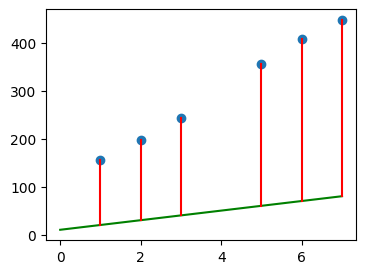

In [2]:
# calculate absolute error
mean_abs_error = sum( abs(y-y_hat1) ) / len(x)
print("mean absolute error =", mean_abs_error)

# create a plot
plt.figure(figsize=(4, 3))
plt.plot(x, y, marker='o', linestyle='')

# create 100 x points for plotting line
line_x = np.linspace(0, 7, 100)
# find the corresponding y values using slope and y-intercept
line_y1 = b1 + m1 * line_x

# plot the line 
plt.plot(line_x, line_y1, color='g')
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_hat1[i]], color='r', linestyle='-')
plt.show()

Does the error get lower if we use the model found by numpy's linear regression algorithm?

mean absolute error = 4.833333333333333


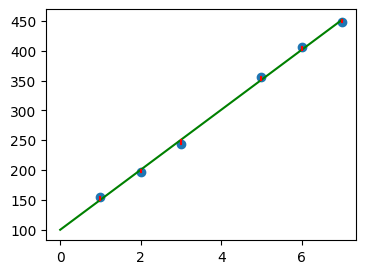

In [3]:
# set parameters found in Week 3
b2 = 99.5952380952382
m2 = 50.39285714285712

# calculate predictions for this model
y_hat2 = b2 + m2*x

# calculate absolute error
mean_abs_error = sum( abs(y-y_hat2) ) / len(x)
print("mean absolute error =", mean_abs_error)

# create a plot
plt.figure(figsize=(4, 3))
plt.plot(x, y, marker='o', linestyle='')

# find the corresponding y values using slope and y-intercept
line_y2 = b2 + m2 * line_x

# plot the line 
plt.plot(line_x, line_y2, color='g')
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_hat2[i]], color='r', linestyle='-')
plt.show()

It does! You can see that this line fits better too.

* There may be more than one choice of error function for an algorithm.
* For linear regression, another option is the mean square error.
* Similarly to taking the absolute value of each deviation, squaring also deals with the cancellation problem we discussed after the question above.

<br>
<img src='Fig3.19.png' width='600'/>
<br>

* The mean square error (MSE) is: $$\text{MSE} = \sum_i^n \frac{\left(y_i - \hat{y}_i\right)^2}{n}$$
* You may recall this from statistics.
* We can also use the root mean square error (RMSE), simply the square root of the above: $$\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\sum_i^n \frac{\left(y_i - \hat{y}_i\right)^2}{n}}$$

Let's calculate the RMSE for the two models we compared above.

In [4]:
# define a function to calculate rmse
def rmse(m, b):
    y_hat = m*x + b
    return (sum( (y-y_hat)**2 ) / len(x))**(1/2)

In [5]:
rmse1 = rmse(m1, b1)
rmse2 = rmse(m2, b2)

print('rmse1 =', rmse1)
print('rmse2 =', rmse2)

rmse1 = 265.9382760466546
rmse2 = 4.941523124872615


Again we see the numpy model is better.

### Geometrical interpretation of the error function

* An error value is determined by the data, and the choice of parameters.  
* In our example, we have two parameters $m$ and $b$; the RMSE is a function of $m$ and $b$.  
* <span style="color:red">*Navigate to the "Visualizing gradient descent" GeoGebra app in the Week 4 module of the course website.*</span>  
    * In the GeoGebra app, you can see the RMSE for our example plotted as a surface.
    * The value of $m$ is represented by the $x$ coordinate.
    * The value of $b$ is represented by the $y$ coordinate.
    * A model is represented by a single point in the 3d plot, $A = (m, b, \text{RMSE})$.
    * Try changing the sliders controlling the values of $m$ and $b$.
    
**<span style="color:green">Q: Can you describe the learning rate in this geometrical interpretation?</span>**

### Gradient descent

* A gradient is just the slope of a surface, such as the RMSE surface in the above GeoGebra example.
* The gradient points uphill, and can be found using calculus.
* *Gradient descent* means moving to lower values of the error function.
* For a certain $(m, b)$, we can find what the gradient of the error function is at that point. This tells us how to change $m$ and $b$ to make the error lower. 
* It *does not* tell us the optimal values of $(m, b)$ which are at the lowest point of the error function.
* We start at some $(m, b)$, and take small steps downhill until we get as low as possible. This is what the trianing loop does.

<br>
<img src='Fig3.21.png' width='400'/>
<br>

* At some point, we reach the lowest possible error, and cannot improve the model any further.
* The plot below shows error on the $y$-axis and epochs of training on the $x$-axis.
* You can see that the error does not get any lower after epoch 2000.

<br>
<img src='Fig3.23.png' width='400'/>
<br>

We calculate the gradient of the rmse for our example problem in the code cell below.
* The gradient is different at different points. We will calculate (approximately) what it is at $(m, b) = (49, 101)$.
* We will use a *numerical method* that is approximately equal to the calculus method.
* A small number $\delta = 0.01$ will be used; (The calculus method takes the limit of $\delta \to 0$).
* We want to find how the rmse changes when each parameter changes by $\delta$.
* The gradient is a vector with two components: $\left(\frac{\Delta \text{rmse}}{\Delta m}, \frac{\Delta \text{rmse}}{\Delta b}\right)$.
* The gradient vector points uphill, so we move in the opposite direction.
* With more parameters, the gradient is a vector with a similar term for each parameter.

In [6]:
delta = 0.01
m = 49
b = 99

# change in rmse over change in m
g1 = (rmse(m + delta, b) - rmse(m, b))/delta

# change in rmse over change in b
g2 = (rmse(m, b + delta) - rmse(m, b))/delta

print('gradient of rmse at (49, 99) =', (g1, g2))

gradient of rmse at (49, 99) = (-3.681641747715503, -0.7290082307370938)


We multiply the gradient by a learning rate, say $\eta = 0.2$, and shift $m$ and $b$ opposite to the gradient. This will give us a slightly better model.

In [7]:
# first, print the rmse at (49, 99)
print('rmse(49, 99) =', rmse(49, 99))

# shift m and b using learning rate and gradient
eta = 0.05
m3 = m - eta * g1
b3 = b - eta * g2

print('rmse(', round(m3, 3), ', ', round(b3, 3), ') = ', rmse(m3, b3), sep = '')

rmse(49, 99) = 8.455767262643882
rmse(49.184, 99.036) = 7.767323702135617


We can see that going downhill on the error function takes us to parameter values that achieve a better result.

**<span style="color:green">Q: What happens if the learning rate is too big?</span>**

There are three different ways to implement gradient descent when training a machine learning model.
* **Stochastic gradient descent** (SGD) considers one randomly chosen point at a time when updating parameters. After a point is chosen a prediction is made, the error and gradient are calculated for that point, and the parameters are updated.
* **Batch gradient descent** consider the entire dataset before updating parameters. Predictions are made for each point in the entire dataset, then the error and gradient are found for the entire dataset, and the parameters are updated.
* **Mini-batch gradient descent** considers a certain number (batch) chosen by the user. Predictions are made for each point in the batch, then the error and gradient are found for the batch, and the parameters are updated.

Batch gradient descent is more stable (it will progress steadily) but can be computationaly expensive for large datasets. The training can be sped up by using mini-batch or stochastic gradient descent, but the plot of error vs. training iterations will be more 'noisy' (jumping up and down from one iteration to the next) while showing an overall downward trend.

<span style="color:red">*Let us now review the textbook code Coding_linear_rergression.ipynb.*</span>

### Real-life application: Using Turi Create to predict housing prices in India

* In the next example, we will train a linear regression model on real housing data from Hyderabad, India.
* <span style="color:red">*First, let's have a look at the csv file. Jupyter will display it nicely.*</span>
* Now, let us load in the data and display the first 10 rows.

In [8]:
import turicreate as tc
data = tc.SFrame('Hyderabad.csv')
data

Finished parsing file /home/jziprick/lectures/week4/Hyderabad.csv

Parsing completed. Parsed 100 lines in 0.028679 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/jziprick/lectures/week4/Hyderabad.csv

Parsing completed. Parsed 2518 lines in 0.022048 secs.

Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens
6968000,1340,Nizampet,2,0,0,1,1,1
29000000,3498,Hitech City,4,0,0,1,1,1
6590000,1318,Manikonda,2,0,0,1,0,0
5739000,1295,Alwal,3,1,0,0,0,0
5679000,1145,Kukatpally,2,0,0,0,0,1
6099000,1230,Nizampet,2,0,0,0,0,0
7000000,1350,Manikonda,2,0,0,0,0,0
4198000,1400,Gachibowli,3,0,0,1,1,0
9900000,2240,Tellapur,3,0,0,1,1,0
9800000,1520,Gachibowli,2,1,0,0,0,0


### One-hot encoding
* Data for machine learning must always be represented numerically.
* *One-hot encoding* is a way to represent categorical data using numbers.
* Notice many of the columns above are filled with zeroes and ones; these columns are *one-hot encoded*.
* For example, the SwimmingPool feature has a one if the house has a swimming pool, and a zero otherwise.

**<span style="color:green">Q: How do you think the linear regression algorithm manages the *Location* feature?</span>**
* Turi Create will automatically one-hot encode the data for you.
* Other functions may require the data to be one-hot encoded before using it as input.

<span style="color:red">*Let us now review the textbook code House_price_predictions.ipynb.*</span>
* Notice there are 275 coefficients found.
* There is a coefficient for each location because the column has been one-hot encoded.

### Parameters and hyperparameters

* A **parameter** is a numerical value found by a model during training.
* Each coefficent in the house price prediction model is a parameter.
* Any quantity that the model creates or modifies during the training process is a parameter.
* A **hyperparameter** is a choice made by the coder to setup model training.
* The learning rate, or even which features to use, are examples of hyperparameters.
* Any quantity that you set before the training process is a hyperparameter.

### What if the data is not in a line? Polynomial regression

* For data that is not linear, we can try adding higher order terms.
* For example, with one feature $x$, we could consider terms $x^2, x^3, x^4, \ldots$
* The *degree* of a polynomial is the highest exponent.
<br>
<img src='Fig3.25.png' width='600'/>
<br>
* Depending on the dataset, a polynomial may fit better than a line.
<br>
<img src='Fig3.26.png' width='400'/>
<br>

What if there is more than one feature?
* With more than one feature, the number of terms can grow quickly.
* At degree $n$, the polynomial includes all possible combinations of features up to that degree.
* For example, with two features $x_1, x_2$, a degree $2$ polynomial is
$$b + w_1 \left(x_1\right) + w_2 \left(x_2\right) + w_{11} \left( x_1 \right)^2 + w_{12} \left( x_1 x_2 \right)
+ w_{22} \left( x_2\right)^2$$
where $b$ is the bias and each $w$ is a weight.
* You can see that this will quickly grow as the number of features and polynomial degree increase.
* We discuss polynomial regression further in the next two weeks.